# Details covering Ch2, Ch3

## Main Addition: Full definitions of various language builder functions presented here

Some of the material in this module could be repetitious, but still good practice.

A video describing the use of this module is below. Following that, we present the top-level functions defined in this module. Then come the function definitions themselves, and finally some tests that drive the functions and illustrate their usage.

**Note**: Some of the contents of the video below may not correspond to the latest code in these notebooks. However the principles remain the same.

**Note**: All functions have good internal documentation; so for example, if you run "help(lstar)", it will fully describe the lstar function.

**Note**: The definition of nthnumeric has evolved (it now expects a list as its second argument).

## This video is the same as in 1c -- less than 18 mins, so plz watch to recap!

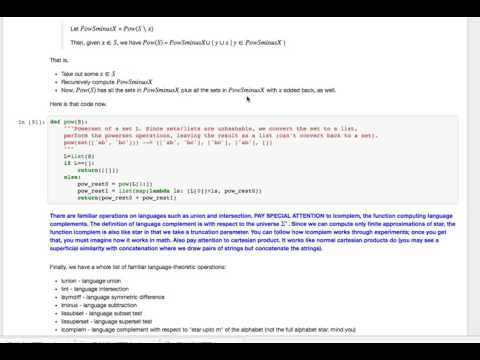

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('TAEYvJn5eGc')

# Top-level functions in this module
 
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)


<span style="color:blue"> **Now we begin following along Chapter-2 of the book ** </span>

# Chapter-2: Alphabet and Languages

We begin our study of Alphabets and Languages. Please read the book. You *must* be doing two kinds of exercises:

* Do exercises on paper. That is the math you need from this course. There is no short-cut to it.

* Do the programming challenges (and play with the code) presented in this notebook (more exercises will be added). This programming part builds intuitions and helps knowledge stick. 

> Let us recall Prof. John McCarthy's quote

>> You do not understand anything unless you have studied it in multiple ways

It is to facilitate the "study in multiple ways" that the programming part is being given to you. It is the centerpiece of this work.

<span style="color:blue"> **Coding philosophy:** </span>

Clearly, the code in this book can be cast into an object-oriented style. We avoid doing so for these reasons:

* We want to keep the barrier to entry as low as possible. In fact, we are extremely parsimonious in our use of Python constructs. 

* We prefer to modularize each concept into specific sections where we treat the math and code as being almost at the same level. We also want these Jupyter notes to resemble Knuth's "literate programs". More reasons will be given in the Jupyter notes of Chapter 3.

<span style="color:blue"> **------** </span>

OK, now onto our subject matter!

## Alphabet and Language


An Alphabet is a *finite* set of finitary items, often called "symbols" - usually they are single characters, but they also could be finite strings or (in the case of GNFA) be themselves regular expressions.  Just think of an Alphabet $\Sigma$ to be a *finite* and *non-empty* set of symbols.

 
__Language__:


A language is a set of sequences (strings) of symbols. We define languages through Python code as follows. 

We are defining regular languages here. 

The simplest regular language is $\emptyset$, the empty language. This is like the "zero" of a language. Why so? We know that "0" is the annihilator for multiplication, i.e. 3 $\times$ 0 = 0. What is the multiplication operation for languages? It is concatenation!


* Notice that in almost all cases, languages are encoded using Python sets.

* Exceptions will be pointed out when they occur.

* Also, in almost all cases, languages are sets of strings.

__Zero Language__:

<span style="color:blue"> **We begin with the empty language (ZERO of a language). We use lphi() to refere to this language, as phi (Greek symbol) is used to denote the empty set. ** </span>

In [2]:
# The theory of languages : Primitive languages and language builders

def lphi():
    """In : None.
       Out: Zero language, i.e. set({}).
    """
    return set({})  # {} could be dict; so we put set(..)

In [3]:
lphi()

set()

__Unit Language__:

<span style="color:blue"> **Now we define the Unit language (ONE of a language) as well as concatenation. We use lunit() and lcat() to refer to these operations. ** </span>

Now let us define the Unit language ("1" for languages with respect to concatenation viewed as multiplication).

Let us also define language concatenation.

> $L1 \; L2 \;\; =\;\;  \{x y \; \mid \; x\in L1 \;\wedge\; y\in L2\}$

# Documentation Conventions

* Functions will have comment strings that start with """ and end with """
* In : will specify inputs separately, mentioning conceptual object and rep (Python data-type) 
* Out: will mention output, mentioning conceptual object and rep (Python data-type)
* Sometimes an example will follow
* Extremely simple helper functions won't have much of a doc (usually a one-liner)
* Example documentation:
```
  """In : L1 (language : a set),
          L2 (language : a set).
     Out: L1 concat L2 (language : a set).
     Example:
     L1 = {'ab', 'bc'} 
     L2 = {'11', 'ab', '22'} 
     lcat(L1,L2) -> {'abab', 'bc22', 'ab11', 'ab22', 'bcab', 'bc11'}
  """
```

In [4]:
def lunit():
    """In : None.
       Out: {""} (a language : a set).
    """
    return {""} # Set with epsilon

def lcat(L1,L2):
    """In : L1 (language : a set),
            L2 (language : a set).
       Out: L1 concat L2 (language : a set).
       Example:
       L1 = {'ab', 'bc'} 
       L2 = {'11', 'ab', '22'} 
       lcat(L1,L2) -> {'abab', 'bc22', 'ab11', 'ab22', 'bcab', 'bc11'}
    """
    return {x+y for x in L1 for y in L2}

In [5]:
""

''

In [6]:
L1 = {"a" * n for n in range(0,3)}
L1

{'', 'a', 'aa'}

In [7]:
L2 = {"b" * m for m in range(0,2)}
L2

{'', 'b'}

In [8]:
lcat(L1,L2)

{'', 'a', 'aa', 'aab', 'ab', 'b'}

In [9]:
lcat(lunit(), L1)

{'', 'a', 'aa'}

In [10]:
x = {'','a'}
xcrossx = { (a,b) for a in x for b in x}
xcrossx

{('', ''), ('', 'a'), ('a', ''), ('a', 'a')}

In [11]:
len(lcat(x,x)) == len(xcrossx)

False

__Language Concatenation vs. Cartesian Product__:

<span style="color:blue"> **Notice the similarity with cartesian product. We draw a string x from L1 and string y from L2, but instead of pairing them, we concatenate them.** </span>

In [12]:
L = {'a','bc'}

print( "lcat(lphi(), L) = ",  lcat(lphi(), L) )
 
print( "lcat(lunit(), L) = ",  lcat(lunit(), L)  )

lcat(lphi(), L) =  set()
lcat(lunit(), L) =  {'a', 'bc'}


## Illustrations 

We now illustrate 

* the Zero language lphi(), 

* unit language lunit(), 

* and the lcat() operator

Let us take a simple example language L = $\{{\text 'a'}, {\text 'bc'}\}$ for illustration.

Recall that in Python, there are multiple ways to quote strings ('a', "a", or """a"""). The main idea is to support the nesting of quotes. So please don't be confused if we accidentally change our quoting method.


Let us define another language through set comprehension, and exercise many different applications of concatenation.


* Consider the language

 > M = $\{ 0^m 1^n \; \mid \; 0 \leq m,n \leq 3 \;\wedge\; m < n \}$

In [13]:
M = {"0"*m + "1"*n for m in range(3) for n in range(4)  if m < n}
print(M)

{'011', '0111', '1', '11', '111', '00111'}


In [14]:
print("lcat(L,M) = ", lcat(L,M))

lcat(L,M) =  {'bc11', 'a011', 'bc111', 'bc00111', 'a111', 'a0111', 'bc011', 'a1', 'a00111', 'bc1', 'a11', 'bc0111'}


In [15]:
print("lcat(M,lphi()) = ", lcat(M,lphi()))

lcat(M,lphi()) =  set()


In [16]:
print("lcat(M,lunit()) = ", lcat(M,lunit()))

lcat(M,lunit()) =  {'011', '0111', '1', '11', '111', '00111'}


<span style="color:green"> **Need to add a few exercises here. ** </span>

### Exponentiation as repeated concatenation

With concatenation and Unit under our belt, we can define exponentiation recursively. Exponentiation is repeated multiplication (which for us is concatenation).

> $L^n = L L^{n-1}$

> $L^0 = Unit$

We must have $L^0 = lunit()$; that is the only logical choice. 


__Question:__  If you defined $L^0 = lphi()$, then what happens?

The code below simulates the aforesaid recursion.

In [17]:
def lexp(L,n):
    """In : L (language : a set),
            n (exponent : a nat).
       Out: L^n (language : a set).
       Example:
       L = {'ab', 'bc'}
       n = 2
       lexp(A,2) -> {'abab', 'bcab', 'bcbc', 'abbc'}
    """
    return lunit() if n == 0 else lcat(L, lexp(L, n-1))


__Let us now test our lexp functionality__:



In [18]:
L = {'a','bc'}
lexp(L,2)

{'aa', 'abc', 'bca', 'bcbc'}

In [19]:
M = {"0"*m + "1"*n for m in range(3) for n in range(4) if m < n }
print('M = ', M)
print('lexp(M,2) = ')
lexp(M,2)

M =  {'011', '0111', '1', '11', '111', '00111'}
lexp(M,2) = 


{'0011100111',
 '00111011',
 '001110111',
 '001111',
 '0011111',
 '00111111',
 '01100111',
 '011011',
 '0110111',
 '0111',
 '011100111',
 '0111011',
 '01110111',
 '01111',
 '011111',
 '0111111',
 '100111',
 '1011',
 '10111',
 '11',
 '1100111',
 '11011',
 '110111',
 '111',
 '11100111',
 '111011',
 '1110111',
 '1111',
 '11111',
 '111111'}

In [20]:
L = {'a','bc'}
M = {"0"*m + "1"*n for m in range(3) for n in range(4) if m < n }
lexp(lcat(L,M),1)

{'a00111',
 'a011',
 'a0111',
 'a1',
 'a11',
 'a111',
 'bc00111',
 'bc011',
 'bc0111',
 'bc1',
 'bc11',
 'bc111'}

<span style="color:green"> **Need to add a few exercises here. ** </span>

<span style="color:blue"> **Definition of the star of a language through function lstar. Since star produces an infinite set in almost all cases, we define a _truncated_ version of star. ** </span>


### With lexp under our belt, we can define lstar. We will define "star up to n" and then set n to infinity.

> $L^{*n} = L^n \; \cup \; L^{*(n-1)}$

> $L^{*0} = Unit$

And thus the classical $L^* = L^{*n}\;\; {\rm for}\;\; n=\infty$, which we won't bother to "run" in Python :-).  We will only run $L^{*n}$ in Python.

We also take care to test that lstar works correctly for lphi and Unit.


In [21]:
def lunion(L1,L2):
    """In : L1 (language : a set),
            L2 (language : a set).
       Out: L1 union L2 (language : a set).
    """
    return L1 | L2

def lstar(L,n):
    """In : L (language : a set),
            n (bound for lstar : a nat). 
       Out: L*_n (language : a set)
    Example:
    L = {'ab','bc'}
    n = 2
    lstar(L,2) -> {'abab', 'bcbc', 'ab', 'abbc', '', 'bc', 'bcab'}
    """
    return lunit() if n == 0 else lunion(lexp(L,n), lstar(L,n-1))

In [22]:
L1 = {'a','bc'}
lstar(L1,2) 

{'', 'a', 'aa', 'abc', 'bc', 'bca', 'bcbc'}

In [23]:
L2 = {'ab','bc'}
lstar(L2,2) 

{'', 'ab', 'abab', 'abbc', 'bc', 'bcab', 'bcbc'}

In [24]:
L2 = {'ab','bc'}
lstar(L2,3)

{'',
 'ab',
 'abab',
 'ababab',
 'ababbc',
 'abbc',
 'abbcab',
 'abbcbc',
 'bc',
 'bcab',
 'bcabab',
 'bcabbc',
 'bcbc',
 'bcbcab',
 'bcbcbc'}

#### Let us define a typical alphabet used in our studies: $\Sigma = \{0,1\}$

In [25]:
Sig01 = {'0','1'}

In [26]:
lstar(Sig01,0)

{''}

In [27]:
lstar(Sig01,1)

{'', '0', '1'}

In [28]:
lstar(Sig01,2)

{'', '0', '00', '01', '1', '10', '11'}

In [29]:
lstar(Sig01,3)

{'',
 '0',
 '00',
 '000',
 '001',
 '01',
 '010',
 '011',
 '1',
 '10',
 '100',
 '101',
 '11',
 '110',
 '111'}

<span style="color:blue"> **Let's do a few exercises involving lstar. Use the pull-down provided by ipywidgets to select your language. Then use the slider to change the lstar truncation limit. If you had an infinite slider and slid it all the way to the right, you would be witnessing the "true star" :-) ** </span>

In [30]:
import ipywidgets as wdg
L1 = {'a','bc'}
L2 = {'ab','bc'}
L3 = {'a','b','c'}
M =  {'011', '111', '11', '0111', '00111', '1'}

wdg.interact(lstar,
L={'L3': L3, 'L1': L1, 'L2':L2, 'M': M, 'lphi': lphi(), 'lunit' : lunit()}, n=(0,7))

interactive(children=(Dropdown(description='L', options={'L3': {'c', 'a', 'b'}, 'L1': {'a', 'bc'}, 'L2': {'ab'…

<function __main__.lstar>

In [31]:
import ipywidgets as wdg
L1 = {'a','bc'}
L2 = {'ab','bc'}
M =  {'011', '111', '11', '0111', '00111', '1'}

wdg.interact(lstar,
L={'L1': L1, 'L2':L2, 'M': M, 'lphi': lphi(), 'lunit' : lunit()}, n=(0,7))

interactive(children=(Dropdown(description='L', options={'L1': {'a', 'bc'}, 'L2': {'ab', 'bc'}, 'M': {'011', '…

<function __main__.lstar>

## Important use-case: Star of an alphabet

We generate the universe of strings possible over an alphabet by starring the alphabet (viewed as a language of strings of length 1). The illustration below shows that.

In [32]:
Alph1 = {'a','b'}
Alph2 = {'0','1'}
wdg.interact(lstar, L={'Alph1': Alph1, 'Alph2':Alph2}, n=(0,7))

interactive(children=(Dropdown(description='L', options={'Alph1': {'a', 'b'}, 'Alph2': {'0', '1'}}, value={'a'…

<function __main__.lstar>

In [33]:
print(lstar(lunit(),10))
print(lstar(lstar(lunit(), 10), 10))

{''}
{''}



Now, we present a set of operations on strings and languages that are self-explanatory, so we'll just summarize them:

* srev - reverse a string
* lrev - reverse a language. It maps srev over a language (set of strings).
* shomo - apply a language homomorphism using a lambda passed in.  You can "rot13" code email using this :-)
* lhomo - apply a homomorphism to a language.

Since tests are embedded in the doc-strings of these functions, we will not show tests separately, but feel free to add tests.


In [34]:
# In Python, there isn't direct support for reversing a string.
# The backward selection method implemented by S[::-1] is what 
# many recommend. This leaves the start and stride empty, and
# specifies the direction to be going backwards. 
# Another method is "".join(reversed(s)) to reverse s

def srev(S):
    """In : S (string)
       Out: reverse of S (string)
       Example:
       srev('ab') -> 'ba'
    """
    return S[::-1] 

def lrev(L):
    """In : L (language : a set)
       Out: reverse of L (language : a set)
       Example: 
       lrev({'ab', 'bc'}) -> {'cb', 'ba'}
    """
    return set(map(lambda x: srev(x), L))

def shomo(S,f):
    """In : S (string)
            f (fun
            ction from char to char)
       Out: String homomorphism of S wrt f.
       Example: 
       S = "abcd"
       f = lambda x: chr( (ord(x)+1) % 256 )
       shomo("abcd",f) -> 'bcde'  
    """
    return "".join(map(f,S))

def lhomo(L,f):
    """In : L (language : set of strings)
            f (function from char to char)
       Out: Lang. homomorphism of L wrt f (language : set of str)
       Example:
       L = {"Hello there", "a", "A"}
       f = rot13 = lambda x: chr( (ord(x)+13) % 256 )
       lhomo(L, rot13) -> {'N', 'Uryy|-\x81ur\x7fr', 'n'}
    """
    return set(map(lambda S: shomo(S,f), L))

<span style="color:blue"> **Let's do a few exercises involving srev, lrev, shomo and lhomo. ** </span>

In [35]:
L={'ab', '007'}

# modulo-rotate all chars by one.
rot1 = lambda x: chr( (ord(x)+1) % 256 ) 

# Don't be baffled if the sets print in a different order!               
# Sets don't have a required positional presentation order
# Watch for the CONTENTS of the set reversing !!
print('lrev(L) = ', lrev(L)) 

print('lhomo(L, rot1) = ', lhomo(L, rot1))

print('lrev(lhomo(L), rot1) = ', lrev(lhomo(L, rot1)))


lrev(L) =  {'ba', '700'}
lhomo(L, rot1) =  {'118', 'bc'}
lrev(lhomo(L), rot1) =  {'cb', '811'}


<span style="color:blue"> **We now introduce powersets which you may have forgotten. We will need this when discussing non-deterministic finite automata.** </span>



We now define the powerset of a set S. We work with lists, as sets cannot contain other sets (not hashable, etc). But barring all that, here is the recursive definition being used.

> Let $PowSminusX$ = $powset(S \setminus x)$

> Then, given $x \in S$, we have $powset(S)$ = $PowSminusX  \cup$  { $y\cup x$  $\mid$ $y\in PowSminusX$ } 

That is,

* Take out some $x\in S$

* Recursively compute $PowSminusX$

* Now, $powset(S)$ has all the sets in $PowSminusX$ plus all the sets in $PowSminusX$ with $x$ added back, as well.

Here is that code now.


In [36]:
def powset(S):
    """In : S (set)
       Out: List of lists representing powerset.
            Since sets/lists are unhashable, we convert the set 
            to a list,perform the powerset operations, leaving 
            the result as a list (can't convert back to a set).
       Example:
       S = {'ab', 'bc'}
       powset(S) -> [['ab', 'bc'], ['bc'], ['ab'], []]
    """
    L=list(S)
    if L==[]:
        return([[]])
    else:
        pow_rest0 = powset(L[1:])
        pow_rest1 = list(map(lambda Ls: [L[0]] + Ls, pow_rest0))
        return(pow_rest0 + pow_rest1)

In [37]:
powset({'a','b','c'})

[[], ['b'], ['a'], ['a', 'b'], ['c'], ['c', 'b'], ['c', 'a'], ['c', 'a', 'b']]

<span style="color:blue"> **There are familiar operations on languages such as union and intersection. 
PAY SPECIAL ATTENTION to lcomplem, the function computing language complements.
The definition of language complement is with respect to the universe  $\Sigma^*$. 
Since we can compute only finite approximations of star, the function lcomplem is also like star in that we take a truncation parameter. You can follow how lcomplem works through experiments; once you get that, you must imagine how it works in math.
Also pay attenti
on to cartesian product. It works like normal cartesian products do (you may see a superficial similarity with concatenation where we draw pairs of strings but concatenate the strings). ** </span>


Finally, we have a whole list of familiar language-theoretic operations:

* lunion - language union

* lint - language intersection

* lsymdiff - language symmetric difference

* lminus - language subtraction

* lissubset - language subset test

* lissuperset - language superset test

* lcomplem - language complement with respect to "star upto m" of the alphabet (not the full alphabet star, mind you)

* product - cartesian product

We do not provide too many tests for these rather familiar functions. But please make sure you understand language complements well!


In [38]:
# Define lunion (as before)
def lunion(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: L1 union L2 (sets of strings)
    """
    return L1 | L2

def lint(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: L1 intersection L2 (sets of strings)
    """
    return L1 & L2

def lsymdiff(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: (L1 \ L2) union (L2 \ L1) (sets of strings)
       Example:
       lsymdiff({'ab', 'bc'}, {'11', 'ab', '22'}) -> {'11', '22', 'bc'}
    """
    return L1 ^ L2

def lminus(L1,L2):
    """Language subtraction of two languages (sets of strings)
       Can do it as L1.difference(L2) also. 
    """
    return L1 - L2

def lissubset(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: L1 is subset or equal to L2 (True/False)
    """
    return L1 <= L2

def lissuperset(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: L1 is superset or equal to L2 (True/False)
    """
    return L1 >= L2
    
def lcomplem(L,sigma,n):
    """In : L (language : set of strings)
            sigma (alphabet : set of strings)
            n (finite limit for lstar : int)
       Out : sigma*_n - L (language : set of strings)
       Example:
       L = {'0', '10', '010'}
       sigma = {'0', '1'}
       n = 3
       lcomplem(L4,{'0','1'}, 3) -> 
       {'', '000', '101', '011', '00', '1', 
        '001', '110', '111', '100', '01', '11'}
    """
    return lstar(sigma,n) - L  

def product(S1,S2):
    """In : S1 (set)
            S2 (set)
       Out: Cartesian product of S1 and S2 (set of pairs)
    """
    return { (x,y) for x in S1 for y in S2 }

#--end

In [39]:
L1 = {'0101'}

In [40]:
L2 = lstar({'0','1'}, 2)

In [41]:
# Python variable L2L1 denotes concat of L2 and L1
L2L1 = lcat(L2,L1)  

In [42]:
L2L1

{'000101', '00101', '0101', '010101', '100101', '10101', '110101'}

In [43]:
L3 = lcat(L1, lunion(lunit(), L2L1))  

In [44]:
L3

{'0101',
 '0101000101',
 '010100101',
 '01010101',
 '0101010101',
 '0101100101',
 '010110101',
 '0101110101'}

In [45]:
# Note that I've provided a truncation limit of 10 for lstar
# involved in language complement.

L4 = {'0', '10', '010'}

print('L4 = ', L4)

print("----")
print("lcomplem(L4,{'0','1'}, 1) = ",  lcomplem(L4,{'0','1'}, 1) )  

print("----")
print("lcomplem(L4,{'0','1'}, 2) = ",  lcomplem(L4,{'0','1'}, 2) ) 

print("----")
print("lcomplem(L4,{'0','1'}, 3) = ",  lcomplem(L4,{'0','1'}, 3) ) 

print("----")
print("lcomplem(L4,{'0','1'}, 4) = ",  lcomplem(L4,{'0','1'}, 4) ) 

print("----")
print("In the limit, we get everything in {0,1}* ")
print(".. except for '0', '10', and '010'. ")

L4 =  {'0', '010', '10'}
----
lcomplem(L4,{'0','1'}, 1) =  {'', '1'}
----
lcomplem(L4,{'0','1'}, 2) =  {'', '1', '00', '11', '01'}
----
lcomplem(L4,{'0','1'}, 3) =  {'', '011', '000', '100', '001', '1', '110', '00', '11', '111', '101', '01'}
----
lcomplem(L4,{'0','1'}, 4) =  {'', '1010', '1110', '000', '100', '110', '0110', '111', '01', '1111', '1100', '0111', '011', '1001', '001', '1', '1000', '1101', '00', '0100', '11', '0010', '0001', '0000', '101', '0011', '0101', '1011'}
----
In the limit, we get everything in {0,1}* 
.. except for '0', '10', and '010'. 


<span style="color:blue"> **This finishes Chapter-2 of the book ** </span>

In [46]:
help(lsymdiff)

Help on function lsymdiff in module __main__:

lsymdiff(L1, L2)
    In : L1 (language : set of strings)
         L2 (language : set of strings)
    Out: (L1 \ L2) union (L2 \ L1) (sets of strings)
    Example:
    lsymdiff({'ab', 'bc'}, {'11', 'ab', '22'}) -> {'11', '22', 'bc'}



In [47]:
As = { "a"*i for i in range(8)}

In [48]:
As

{'', 'a', 'aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa'}

In [49]:
Bs = { "b"*i for i in range(8)}

In [50]:
Bs

{'', 'b', 'bb', 'bbb', 'bbbb', 'bbbbb', 'bbbbbb', 'bbbbbbb'}

In [51]:
Cs = { "c"*i for i in range(8)}

In [52]:
Cs

{'', 'c', 'cc', 'ccc', 'cccc', 'ccccc', 'cccccc', 'ccccccc'}

In [53]:
ABs = { "a"*i + "b" * i for i in range (8)}

In [54]:
ABs

{'',
 'aaaaaaabbbbbbb',
 'aaaaaabbbbbb',
 'aaaaabbbbb',
 'aaaabbbb',
 'aaabbb',
 'aabb',
 'ab'}

In [55]:
BCs = { "b"*i + "c" * i for i in range (8)}

In [56]:
BCs

{'',
 'bbbbbbbccccccc',
 'bbbbbbcccccc',
 'bbbbbccccc',
 'bbbbcccc',
 'bbbccc',
 'bbcc',
 'bc'}

In [57]:
lcat(ABs, Cs)

{'',
 'aaaaaaabbbbbbb',
 'aaaaaaabbbbbbbc',
 'aaaaaaabbbbbbbcc',
 'aaaaaaabbbbbbbccc',
 'aaaaaaabbbbbbbcccc',
 'aaaaaaabbbbbbbccccc',
 'aaaaaaabbbbbbbcccccc',
 'aaaaaaabbbbbbbccccccc',
 'aaaaaabbbbbb',
 'aaaaaabbbbbbc',
 'aaaaaabbbbbbcc',
 'aaaaaabbbbbbccc',
 'aaaaaabbbbbbcccc',
 'aaaaaabbbbbbccccc',
 'aaaaaabbbbbbcccccc',
 'aaaaaabbbbbbccccccc',
 'aaaaabbbbb',
 'aaaaabbbbbc',
 'aaaaabbbbbcc',
 'aaaaabbbbbccc',
 'aaaaabbbbbcccc',
 'aaaaabbbbbccccc',
 'aaaaabbbbbcccccc',
 'aaaaabbbbbccccccc',
 'aaaabbbb',
 'aaaabbbbc',
 'aaaabbbbcc',
 'aaaabbbbccc',
 'aaaabbbbcccc',
 'aaaabbbbccccc',
 'aaaabbbbcccccc',
 'aaaabbbbccccccc',
 'aaabbb',
 'aaabbbc',
 'aaabbbcc',
 'aaabbbccc',
 'aaabbbcccc',
 'aaabbbccccc',
 'aaabbbcccccc',
 'aaabbbccccccc',
 'aabb',
 'aabbc',
 'aabbcc',
 'aabbccc',
 'aabbcccc',
 'aabbccccc',
 'aabbcccccc',
 'aabbccccccc',
 'ab',
 'abc',
 'abcc',
 'abccc',
 'abcccc',
 'abccccc',
 'abcccccc',
 'abccccccc',
 'c',
 'cc',
 'ccc',
 'cccc',
 'ccccc',
 'cccccc',
 'ccccccc'}

In [58]:
lcat(As, Bs)

{'',
 'a',
 'aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaab',
 'aaaaaaabb',
 'aaaaaaabbb',
 'aaaaaaabbbb',
 'aaaaaaabbbbb',
 'aaaaaaabbbbbb',
 'aaaaaaabbbbbbb',
 'aaaaaab',
 'aaaaaabb',
 'aaaaaabbb',
 'aaaaaabbbb',
 'aaaaaabbbbb',
 'aaaaaabbbbbb',
 'aaaaaabbbbbbb',
 'aaaaab',
 'aaaaabb',
 'aaaaabbb',
 'aaaaabbbb',
 'aaaaabbbbb',
 'aaaaabbbbbb',
 'aaaaabbbbbbb',
 'aaaab',
 'aaaabb',
 'aaaabbb',
 'aaaabbbb',
 'aaaabbbbb',
 'aaaabbbbbb',
 'aaaabbbbbbb',
 'aaab',
 'aaabb',
 'aaabbb',
 'aaabbbb',
 'aaabbbbb',
 'aaabbbbbb',
 'aaabbbbbbb',
 'aab',
 'aabb',
 'aabbb',
 'aabbbb',
 'aabbbbb',
 'aabbbbbb',
 'aabbbbbbb',
 'ab',
 'abb',
 'abbb',
 'abbbb',
 'abbbbb',
 'abbbbbb',
 'abbbbbbb',
 'b',
 'bb',
 'bbb',
 'bbbb',
 'bbbbb',
 'bbbbbb',
 'bbbbbbb'}

In [59]:
ABCs = {"a"*i + "b"*i + "c"*i for i in range(8)}

In [60]:
ABCs

{'',
 'aaaaaaabbbbbbbccccccc',
 'aaaaaabbbbbbcccccc',
 'aaaaabbbbbccccc',
 'aaaabbbbcccc',
 'aaabbbccc',
 'aabbcc',
 'abc'}

Exercise added.

Firstly, choosing alphabet set as $\sum$ = {"a", "b"}.

> $\sum^0$ = { " ", $\sum^1$ = { "a", "b" }, $\sum^2$ = { "aa", "bb", "ab", "ba" }, 
$\sum^3$ = { "aaa", "aab", "bba", "bbb", "aba", "abb", "baa", "bab" }, and so on..

> Therefore, $\sum^*$ = { " ", "a", "b", "aa", "bb", "ab", "ba", "aaa", "aab", "bba", "bbb", "aba", "abb", "baa", "bab", "aaaa", ...}

Let us define a language, N such that the second character of the string is "a" and its of maximum length 3, 

> N = { " ", "a", "b","aa", "ba", "aab", "aaa", "baa", "bab"}.



Another, language P is defined as, The string ends with "b" and is of maximum length 2, 

> P =  { " ", "b", "ab", "bb"}.

Applying, lcat() on N and P.

 









In [62]:
N = {"", "a", "b","aa", "ba", "aab", "aaa", "baa", "bab"}
P =  {"", "b","ab", "bb"}

print( "lcat(N, P) = ",  lcat(N, P) )

lcat(N, P) =  {'', 'aabb', 'b', 'baab', 'aab', 'bbb', 'bb', 'babb', 'aaabb', 'baabb', 'aaaab', 'babab', 'baaab', 'a', 'baa', 'aaab', 'aabab', 'babbb', 'aabbb', 'bab', 'abb', 'ab', 'ba', 'aaa', 'aa'}


Now, Applying lstar() on N and P both.

In [64]:
print( "lstar(N, 2) = ",  lstar(N, 2) )
print( "lstar(P, 2) = ",  lstar(P, 2) )

lstar(N, 2) =  {'', 'aabbab', 'aabb', 'b', 'aabaa', 'baba', 'baab', 'aaaaa', 'aab', 'bb', 'babb', 'baabab', 'baaa', 'aaba', 'aaaab', 'aaabab', 'aabaab', 'baaaab', 'babab', 'baaab', 'aabbaa', 'baaaaa', 'a', 'baa', 'aaab', 'bbaa', 'bba', 'babaab', 'aabab', 'baaba', 'abaa', 'babbaa', 'aabaaa', 'aaaba', 'bbab', 'aaaa', 'abab', 'aaabaa', 'bab', 'baaaa', 'aabba', 'babba', 'ab', 'babaa', 'aaaaaa', 'aaaaab', 'babbab', 'babaaa', 'ba', 'aaa', 'aa', 'baabaa', 'aba'}
lstar(P, 2) =  {'', 'bab', 'abb', 'b', 'abbb', 'ab', 'bbbb', 'bbb', 'bbab', 'bb', 'abab'}


# Now, do the exercises at the end of Ch2 and Ch3